# 1. IMDB (순환신경망) - 원-핫 인코딩

In [1]:
from tensorflow import keras
from keras.datasets import imdb

In [2]:
# 가장 자주 나타나는 단어 300개만 사용
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=300)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape, train_target.shape)
print(test_data.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
print(train_data[:3])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 

In [5]:
print(train_target[:20])   # 0(부정), 1(긍정)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(train_data, train_target, test_size=0.2, random_state=0)

In [ ]:
# 단어 개수 구하기
import numpy as np
word_count = np.array([len(x) for x in train_data])
word_count

array([464,  42, 372, ..., 108, 302, 188])

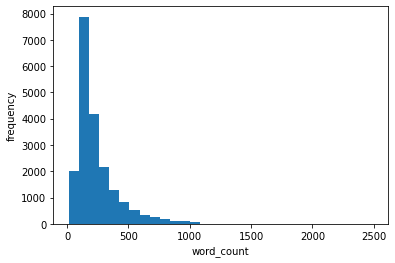

In [ ]:
# 단어 개수 시각화하기
import matplotlib.pyplot as plt
plt.hist(word_count, bins=30)
plt.xlabel('word_count')
plt.ylabel('frequency')
plt.show()

In [7]:
# 리뷰 길이를 100으로 맞추기
# 100보다 큰 경우 앞부분을 자르고, 100보다 작은 경우 앞부분에 0을 넣음
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_data, maxlen=100)
print(train_seq.shape)   # (샘플 갯수, 토큰 개수(타임스텝 개수))

(20000, 100)


In [8]:
val_seq = pad_sequences(val_data, maxlen=100)
print(val_seq.shape)     # (5000, 100)

(5000, 100)


In [9]:
# 훈련 데이터 원-핫 인코딩하기
train_oh = keras.utils.to_categorical(train_seq)   # 단어 300개 중 하나만 1이고 나머지는 0
print(train_oh.shape)     # (20000, 100, 300)

(20000, 100, 300)


In [10]:
# 검증 데이터 원-핫 인코딩하기
val_oh = keras.utils.to_categorical(val_seq)      # 단어 300개 중 하나만 1이고 나머지는 0
print(val_oh.shape)      # (5000, 100, 300)

(5000, 100, 300)


In [11]:
train_oh[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
from keras import models, layers

model = models.Sequential()
model.add(layers.SimpleRNN(6,                         # 은닉상태크기
                           input_shape=(100, 300)))   # (타임스텝크기, 입력데이터크기)
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 6)                 1842      
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 [==============================] - 38s 54ms/step - loss: 0.6098 - accuracy: 0.6601 - val_loss: 0.5535 - val_accuracy: 0.7228
Epoch 2/100
625/625 [==============================] - 33s 52ms/step - loss: 0.5354 - accuracy: 0.7393 - val_loss: 0.5523 - val_accuracy: 0.7246
Epoch 3/100
625/625 [==============================] - 32s 51ms/step - loss: 0.5182 - accuracy: 0.7515 - val_loss: 0.5305 - val_accuracy: 0.7370
Epoch 4/100
625/625 [==============================] - 33s 53ms/step - loss: 0.5105 - accuracy: 0.7556 - val_loss: 0.5250 - val_accuracy: 0.7342
Epoch 5/100
625/625 [==============================] - 32s 52ms/step - loss: 0.5000 - accuracy: 0.7607 - val_loss: 0.5378 - val_accuracy: 0.7376
Epoch 6/100
625/625 [==============================] - 33s 53ms/step - loss: 0.4939 - accuracy: 0.7689 - val_loss: 0.5403 - val_accuracy: 0.7260


In [ ]:
test_seq = pad_sequences(test_data, maxlen=100)
print(test_seq.shape)

(25000, 100)


In [ ]:
# 테스트 데이터 원-핫 인코딩하기
test_oh = keras.utils.to_categorical(test_seq)
print(test_oh.shape)

(25000, 100, 300)


In [ ]:
model.evaluate(test_oh[:100], test_target[:100])  # loss ( 0.5109 ), accuracy ( 0.7599 )

4/4 [==============================] - 0s 11ms/step - loss: 0.5060 - accuracy: 0.7500


[0.5060377717018127, 0.75]

# 2. IMDB (순환신경망) - 단어 임베딩

In [ ]:
model2 = models.Sequential()
model2.add(layers.Embedding(300,                 # 어휘 사전 크기 (입력데이터크기)
                            5,                   # 임베딩 벡터 크기
                            input_length=100))   # 타임 스텝 크기(시퀀스 길이)
model2.add(layers.SimpleRNN(8))                  # 뉴런 개수
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()     # 파라메터수 ( 2,545개 )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 5)            1500      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn2.h5', save_best_only=True)

history = model2.fit(train_seq, train_target, epochs=100,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 [==============================] - 48s 75ms/step - loss: 0.6192 - accuracy: 0.6640 - val_loss: 0.5648 - val_accuracy: 0.7190
Epoch 2/100
625/625 [==============================] - 47s 75ms/step - loss: 0.5561 - accuracy: 0.7251 - val_loss: 0.5599 - val_accuracy: 0.7162
Epoch 3/100
625/625 [==============================] - 46s 74ms/step - loss: 0.5333 - accuracy: 0.7405 - val_loss: 0.5479 - val_accuracy: 0.7338
Epoch 4/100
625/625 [==============================] - 48s 77ms/step - loss: 0.5208 - accuracy: 0.7467 - val_loss: 0.5284 - val_accuracy: 0.7324
Epoch 5/100
625/625 [==============================] - 47s 76ms/step - loss: 0.5136 - accuracy: 0.7545 - val_loss: 0.5488 - val_accuracy: 0.7272
Epoch 6/100
625/625 [==============================] - 46s 74ms/step - loss: 0.5078 - accuracy: 0.7580 - val_loss: 0.5255 - val_accuracy: 0.7352
Epoch 7/100
625/625 [==============================] - 48s 76ms/step - loss: 0.5023 - accuracy: 0.7612 - val_loss: 0.5351 - val_ac

In [ ]:
model2.evaluate(test_seq[:100], test_target[:100])   # loss ( 0.5314 ), accuracy ( 0.74 )

4/4 [==============================] - 0s 10ms/step - loss: 0.5529 - accuracy: 0.7400


[0.5528892278671265, 0.7400000095367432]